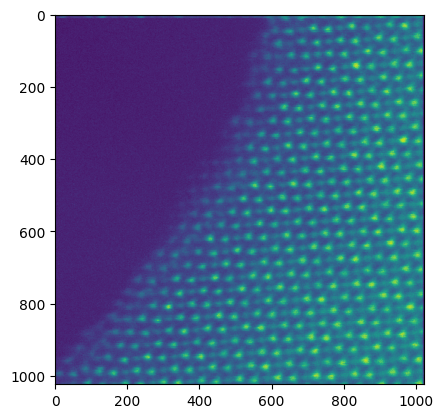

In [1]:
from qem.crystal_analyzer import CrystalAnalyzer
import hyperspy.api as hs   
import scipy.io as sio
import matplotlib.pyplot as plt


file = '/home/zzhang/OneDrive/data/Yang Zhang STO/dynamic pc AXON/adf_avg_25.hspy'
s = hs.load(file)
image = s.data
dx =0.071356
matfile_path = '/home/zzhang/OneDrive/data/Yang Zhang STO/dynamic pc AXON/adf_avg_coords.mat'
matfile = sio.loadmat(matfile_path)
coords = matfile['coords'].astype(float)
crystal_analyzer = CrystalAnalyzer(image, dx, coords[:,:2]/dx, coords[:,2].astype(int)-1,['Y','Al'])

plt.imshow(image)

In [2]:
import numpy as np
cif_file_path = '/home/zzhang/OneDrive/data/Yang Zhang STO/STEM/72104-CaYAlO4-rotated.cif'
crystal_analyzer.read_cif(cif_file_path)


INFO:root:Reading CIF file: /home/zzhang/OneDrive/data/Yang Zhang STO/STEM/72104-CaYAlO4-rotated.cif. The elements selected are ['Y', 'Al'] and the elements in the CIF file are Y4Al2O8


Atoms(symbols='Y4Al2O8', pbc=True, cell=[3.6451, 11.8743, 3.6451], spacegroup_kinds=...)

In [4]:
import matplotlib
import numpy as np
%matplotlib qt
crystal_analyzer.origin = np.array([831.26558017, 962.21710935])
crystal_analyzer.a_vector_affine = np.array([ 31.26403339, -36.73158211])
crystal_analyzer.b_vector_affine = np.array([-118.32881689, -100.67459688])
# crystal_analyzer.c = crystal_analyzer.unitcell.cell[2]
atoms = crystal_analyzer.get_atomic_columns(reciprocal=True)

/home/zzhang/OneDrive/code/qem/qem/gui_classes.py:371: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(
INFO:root:Origin selected: [729.89414495 717.68525626]
INFO:root:Vector a selected: [ 31.13206734 -36.96329272]
INFO:root:Vector b selected: [-118.47743562 -100.66568682]
INFO:root:In pixel: Origin: [729.89414495 717.68525626], Vector a: [ 31.13206734 -36.96329272], Vector b: [-118.47743562 -100.66568682]
INFO:root:In space: Origin: [52.08232661 51.21114915] A, Vector a: [ 2.2214598  -2.63755272] A, Vector b: [-8.4540759  -7.18310075] A
INFO:root:Origin selected: [512. 512.]
INFO:root:Vector a selected: [ 28. -32.]
INFO:root:Vector b selected: [-10.  -8.]
INFO:root:In pixel: Origin: [512. 512.], Vector a: [ 28. -32.], Vector b: [-10.  -8.]
INFO:root:In space: Origin: [7.00711923 7.00711923] 1/A, Vector a: [ 0.38320183 -0.437944

In [7]:
crystal_analyzer.plot_unitcell()

In [5]:
crystal_analyzer.plot_displacement('local')

In [15]:
from ase.visualize import view

view(crystal_analyzer.lattice)

<Popen: returncode: None args: ['/home/zzhang/miniconda3/envs/jax/bin/python...>

In [9]:
crystal_analyzer.plot_strain(3.0)

/home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/matscipy/atomic_strain.py:107: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x, residuals, rank, s = np.linalg.lstsq(dr_old[mask], dr_now[mask])


In [11]:
import matplotlib.pyplot as plt
shift_origin_adaptive = crystal_analyzer.get_origin_offset()
shifts = np.array(list(shift_origin_adaptive.values()))
plt.imshow(crystal_analyzer.image)
plt.scatter(shifts[:,0],shifts[:,1],color='y',label='adaptive')

shift_origin_perfect = crystal_analyzer.get_origin_offset(mode='perfect')
shifts = np.array(list(shift_origin_perfect.values()))
plt.scatter(shifts[:,0],shifts[:,1],color='b',label='perfect')

plt.legend()
plt.title('Unit cell origin locations')

Text(0.5, 1.0, 'Unit cell origin locations')

In [13]:
lattice, lattice_ref = crystal_analyzer.get_lattice_3d()
lattice_ref.write('test.xyz')
from ase.visualize import view
view(lattice_ref)

<Popen: returncode: None args: ['/home/zzhang/miniconda3/envs/jax/bin/python...>

In [16]:
from ase import Atoms
from ase.io import read
from ase.visualize import view
import numpy as np

lattice = read('TiO2_mp-554278_conventional_standard.cif')
lattice_ref = read('TiO2_mp-554278_conventional_standard.cif')
# lattice.positions = lattice.positions *1.1
strain_tensor = np.array([[1.1, 0, 0],
                          [0, 1.1, 0],
                          [0, 0, 1]])
# new_cell = np.dot(lattice.cell,strain_tensor)
# lattice.set_cell(new_cell)
# get the fractional coordinates
lattice.set_cell(np.dot(strain_tensor,lattice.cell))
lattice.set_scaled_positions(lattice_ref.get_scaled_positions())
# lattice.set_positions(strain_tensor @ lattice.cell @ lattice.get_scaled_positions())
# view(lattice)

from qem.atomic_column import AtomicColumns

atomic_columns = AtomicColumns(lattice, lattice_ref,elements=['Ti','O'],pixel_size=1)


In [17]:
import matplotlib.pyplot as plt
plt.scatter(lattice.positions[:,1],lattice.positions[:,0],c='r')
plt.scatter(lattice_ref.positions[:,1],lattice_ref.positions[:,0],c='b')

In [18]:
atomic_columns.get_strain( 5.0)

(array([0.09676952, 0.09682547, 0.09182376, 0.09285239, 0.0960112 ,
        0.09949664, 0.09949664, 0.0960112 , 0.09285239, 0.09182376,
        0.09682547, 0.09676952, 0.09676952, 0.09682547, 0.09182376,
        0.09285239, 0.0960112 , 0.09949664, 0.09949664, 0.0960112 ,
        0.09285239, 0.09182376, 0.09682547, 0.09676952]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
        0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([-0.00442076,  0.01287876,  0.01198328,  0.02952939,  0.0147019 ,
        -0.00269986, -0.00269986,  0.0147019 ,  0.02952939,  0.01198328,
         0.01287876, -0.00442076,  0.00442076, -0.01287876, -0.01198328,
        -0.02952939, -0.0147019 ,  0.00269986,  0.00269986, -0.0147019 ,
        -0.02952939, -0.01198328, -0.01287876,  0.00442076]),
 array([-0.00442076,  0.01287876,  0.01198328,  0.02952939,  0.0147019 ,
        -0.00269986, -0.00269986,  0.0147019 ,  0.02952939,  0.01198328,
         0.01287876, -0.00442076

In [19]:
from matscipy.atomic_strain import atomic_strain

atomic_strain(lattice, lattice_ref,cutoff=10.0)

(array([[[ 1.10000000e+00,  2.84494650e-16,  3.04682581e-02],
         [-5.69429521e-17,  1.10000000e+00, -3.10765298e-16],
         [-7.97862102e-18,  1.11022302e-16,  1.00000000e+00]],
 
        [[ 8.67212388e-01,  5.73413805e-01,  6.13175537e-02],
         [ 3.17364054e-17,  1.10000000e+00,  3.41716019e-16],
         [ 1.33024162e-16,  2.22044605e-16,  1.00000000e+00]],
 
        [[ 1.10000000e+00, -1.31838984e-16,  3.04682581e-02],
         [-1.14440939e-16,  1.10000000e+00, -2.27791300e-16],
         [ 8.57691735e-17, -3.33066907e-16,  1.00000000e+00]],
 
        [[ 1.10000000e+00,  4.02455846e-16,  3.04682581e-02],
         [ 4.47724419e-17,  1.10000000e+00,  2.19609619e-16],
         [ 1.88423342e-16,  5.55111512e-16,  1.00000000e+00]],
 
        [[ 1.10000000e+00,  2.81025203e-16,  3.04682581e-02],
         [ 5.94834805e-17,  1.10000000e+00,  2.48666037e-16],
         [ 7.09728221e-17, -4.44089210e-16,  1.00000000e+00]],
 
        [[ 8.73556412e-01,  5.51317912e-01, -1.80865049

In [11]:
lattice.write('deformed.xyz')
lattice_ref.write('reference.xyz')

In [1]:
# -*- coding: utf-8 -*-

from ovito.io import import_file, export_file
from ovito.modifiers import *

node = import_file("deformed.xyz")

modifier=AtomicStrainModifier()
modifier.reference.load("reference.xyz")


#Cutoff should account for 3 neighbor shells, for fcc that is 1.225 times a, Here we use L512 lattice constant of aluminum (QCGD)
modifier.cutoff=5.0

#modifier.output_deformation_gradients=True
#modifier.output_nonaffine_squared_displacements=True
modifier.output_strain_tensors=True

#Calculate Atomic strains
node.modifiers.append(modifier)

modifier1 = CommonNeighborAnalysisModifier()
node.modifiers.append(modifier1)



/home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/ovito/_extensions/anari.py:2: UserWarning: Did you accidentally install the OVITO package from the PyPI repository in an Anaconda/Miniconda Python interpreter using the 'pip' command? This will likely lead to conflicts with existing libraries in the Anaconda environment, and import of the OVITO module may fail with an error related to the Qt framework. To fix this, please uninstall the ovito pip package by running 'pip uninstall -y ovito PySide6' and then install the OVITO Anaconda package provided by OVITO GmbH. Visit https://docs.ovito.org/python/introduction/installation.html for further instructions. If you would rather like to ignore this warning message, add the following code to the top of your Python script:

  import warnings
  warnings.filterwarnings('ignore', message='.*OVITO.*PyPI')

  import ovito._extensions.pyscript


ImportError: /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/PySide6/Qt/lib/libQt6Gui.so.6: undefined symbol: _Zls6QDebugRK15QDBusObjectPath, version Qt_6